In [3]:
import re
import pandas as pd
import seaborn as sns
import time
import matplotlib.pyplot as plt
working_df = pd. read_csv('modules/maintenance.csv')

In [31]:
def list_choices(df):
    counter = 1
    choice_dict = {}
    for choice in list(df['Model name'].unique()):
        choice_dict[counter] = choice
        print(f"{counter}. {choice}")
        counter += 1
    return  choice_dict

In [2]:
import matplotlib.pyplot as plt
working_df = pd. read_csv('modules/maintenance.csv')
company_name = input("Please input the company name you wish to check stats for")
companies = list(working_df['Company Name'].unique())
if company_name.lower() in companies:
    company_df = working_df.loc[working_df['Company Name'] == company_name]
    choices_dict = list_choices(company_df)
    time.sleep(1)
    model = input("Please enter the choice for the model needed")
    model_name = choices_dict[int(model)]
    print(f"Price_distribution for {model_name} is ...")
    company_prices = company_df.loc[company_df['Model name'] == model_name, 'Price'].tolist()
sns.displot(company_prices, kde = True, color= 'g')
#plt.show()

NameError: name 'pd' is not defined

In [52]:
#Analysis based on companies, checking the avg/min/max price per company
df_obj = working_df.select_dtypes(['object'])
working_df[df_obj.columns] = df_obj.apply(lambda x : x.str.strip())
#print(working_df['Company Name'].value_counts())
group_df = working_df[['Company Name', 'Price']].groupby(['Company Name']).agg({'Price' : ['max', 'mean', 'min']})
group_df.columns= ['Price_max', 'Price_avg', 'Price_min']
group_df['Price_avg'] = group_df['Price_avg'].apply(lambda x: round(x,2))
group_df.reset_index(inplace=True)

In [4]:
from matplotlib import pyplot
working_df['Date_time'] = working_df["Date"] +" " + working_df['Time']
working_df.drop(['Date','Time'], axis=1, inplace=True)
working_df['Date_time'] = pd.to_datetime(working_df['Date_time'])

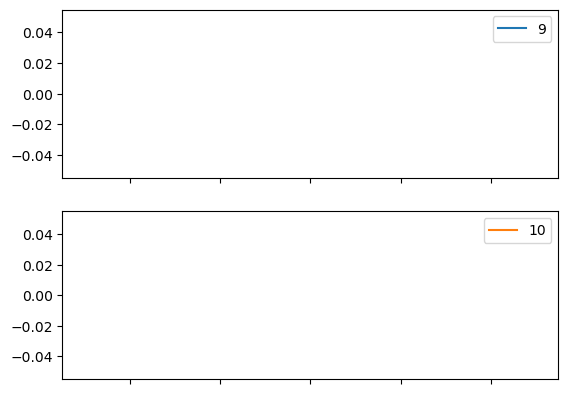

In [7]:
company = "acer"
company_df_l = working_df[working_df['Company Name'] == company]
company_df_l_plot = company_df_l[['Model name','Date_time','Price']]
model_df = company_df_l_plot.loc[company_df_l_plot['Model name'] == 'nitro 5 fhd',['Date_time', 'Price']]
model_df.set_index('Date_time', inplace=True)
groups = model_df.groupby(pd.Grouper(freq='M'))
days = pd.DataFrame()
for name,group in groups:
    days[name.month] = round(group.values.mean(),0)
days.plot(subplots=True, legend=True)
pyplot.show()